In [66]:
import sys

import pandas as pd
import numpy as np
from scipy import signal

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import sqlite3 as lite
conn = lite.connect('/Users/b/Library/Containers/com.kamoamoa.smartppe.FaceBit-Companion/Data/Documents/db.sqlite')

In [56]:
events_query = """
    SELECT * FROM event
"""

df_events = pd.read_sql_query(events_query, conn)
df_events.head()

,id,event_type,start_date,end_date
0,1,normal_breathing,2021-01-29T20:01:57.194Z,2021-01-29T20:02:21.746Z


In [57]:
# read time series table into pandas
time_series_query = '''
    SELECT t.id, t.value, t.date, t.type, e.id as event_id, e.event_type 
    FROM time_series_measurement as t
    LEFT JOIN event as e ON e.id = t.event_id
    WHERE e.id == 1
    ORDER BY t.date DESC
    LIMIT 10000;
'''

df = pd.read_sql_query(time_series_query, conn)

# map date to datetime64
df['datetime'] = df['date'].map(lambda date: datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%fZ'))

df.head()


,id,value,date,type,event_id,event_type
0,2401,1005.87,2021-01-29T20:02:20.480Z,pressure,1,normal_breathing
1,2402,1005.89,2021-01-29T20:02:20.440Z,pressure,1,normal_breathing
2,2403,1005.87,2021-01-29T20:02:20.400Z,pressure,1,normal_breathing
3,2404,1005.84,2021-01-29T20:02:20.360Z,pressure,1,normal_breathing
4,2405,1005.85,2021-01-29T20:02:20.320Z,pressure,1,normal_breathing


id                     int64
value                float64
date                  object
type                  object
event_id               int64
event_type            object
datetime      datetime64[ns]
dtype: object

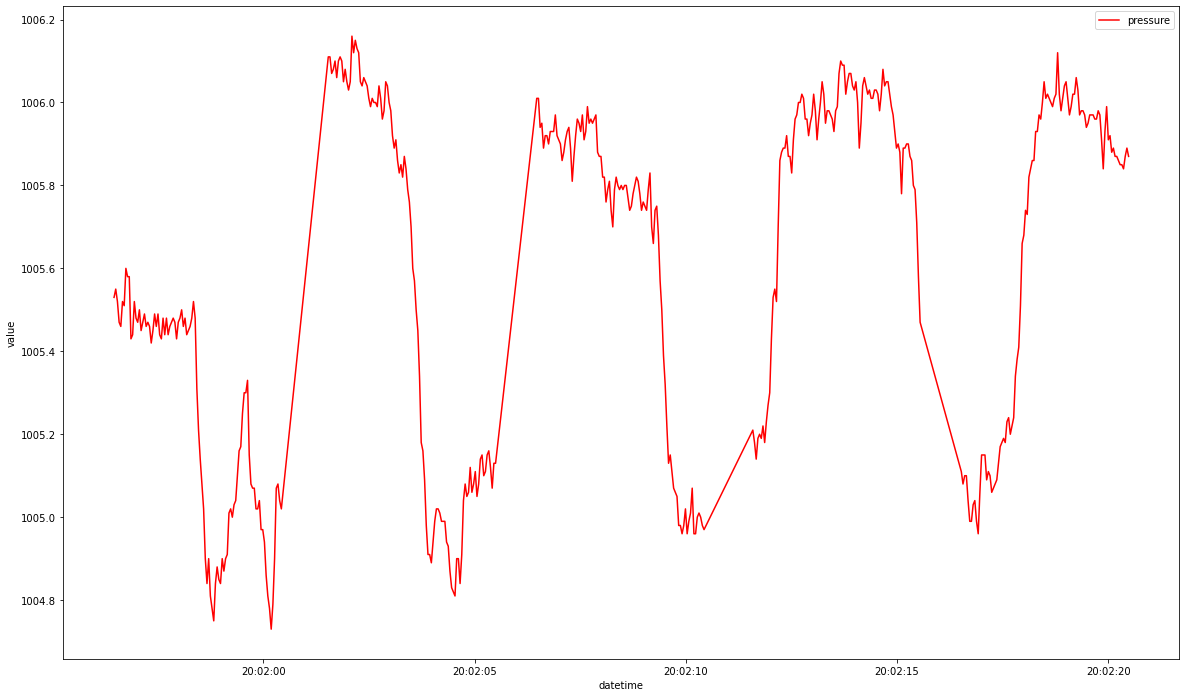

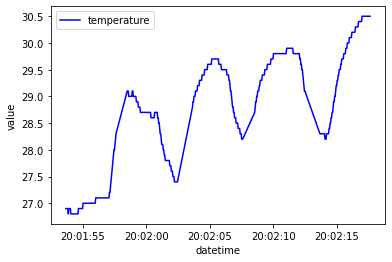

In [90]:
# event_1 = df.where(df['event_id']==1).dropna()
# event_1_temp = event_1.where(event_1['type'] == 'temperature').dropna()
# plt.figure(figsize=(20,12))

pressure = df.where(df['type'] == 'pressure')
temp = df.where(df['type'] == 'temperature')


sns.lineplot(
    x='datetime',
    y='value',
    data=pressure,
    color='r',
    label='pressure'
)

plt.show()

sns.lineplot(
    x='datetime',
    y='value',
    data=temp,
    color='b',
    label='temperature'
)
plt.show()


<AxesSubplot:xlabel='datetime', ylabel='value'>

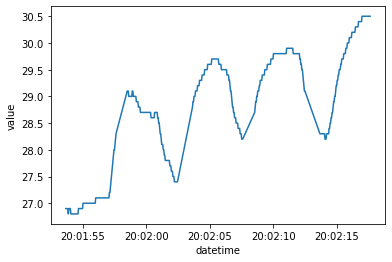

In [81]:
temp = df.where(df['type'] == 'temperature')

temp.head()

sns.lineplot(
    x='datetime',
    y='value',
    data=temp
)